In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model, neighbors
)

In [118]:
# creating the synthetic dataset
N = 20
features = np.linspace(-10, 10, num=N)
targets = 2*features**2 - 3 + np.random.uniform(-2, 2, N)
(train_ftrs, train_trgt, test_ftrs, test_trgt) = skms.train_test_split(features, targets, test_size=N//2)

In [119]:
# displaying the dataframe based on the above training features and targets.
display(pd.DataFrame(
    {
        "features": train_ftrs,
        "targets": train_trgt
    }
).T)

,0,1,2,3,4,5,6,7,8,9
features,10.000000,-3.684211,-8.947368,-7.894737,6.842105,-6.842105,3.684211,1.578947,-2.631579,-1.578947
targets,-4.736842,5.789474,4.736842,7.894737,2.631579,8.947368,-0.526316,0.526316,-5.789474,-10.000000


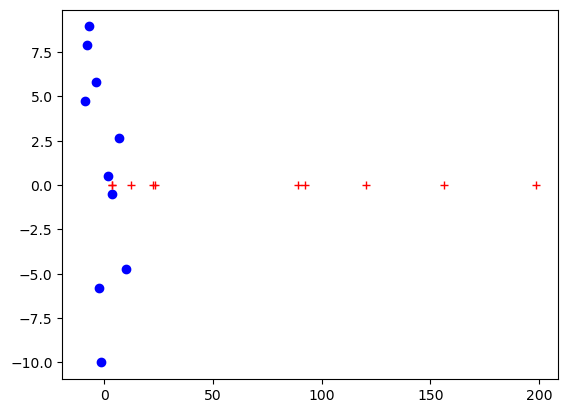

In [120]:
# plotting the dataset
plt.plot(train_ftrs, train_trgt, "bo")
plt.plot(test_ftrs, np.zeros_like(test_ftrs), "r+")
# training set is in blue dots.
# the red pluses show the input feature values for the test set.

In [121]:
skmodel = linear_model.LinearRegression()
fit = skmodel.fit(train_ftrs.reshape(-1, 1), train_trgt)
predictions = skmodel.predict(test_ftrs.reshape(-1, 1))
predictions[:3]

array([-95.88005013, -10.82448571, -75.36631795])

In [122]:
# manually manipulating code complexity.

In [123]:
# using the polyfit routine from the numpy library.
# to fit-predict-evaluate a 1d polynomial. (a line)
model_oneD = np.poly1d(np.polyfit(train_ftrs, train_trgt, 1))
predictions_oneD = model_oneD(test_ftrs)
predictions_oneD[:3]

array([-95.88005013, -10.82448571, -75.36631795])

In [130]:
# checking if the output from the lr model is same as that from the polyfit model.
print(f"all close? {np.allclose(predictions, predictions_oneD)}")
# calculating the RMSE of these models.
print(f"RMSE of the lr model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions))} ")
print(f"RMSE of the oneD model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions_oneD))} ")

all close? True
RMSE of the lr model : 125.65491057439891 
RMSE of the oneD model : 125.65491057439891 


In [131]:
# experimenting with a degree 2 polynomial, which is a parabola.
model_twoD = np.poly1d(np.polyfit(train_ftrs, train_trgt, 2))
predictions_twoD = model_twoD(test_ftrs)
predictions_twoD[:3]
# now calculating the RMSE of the degree 2 polynomial model.
print(f"RMSE of the degree-2 model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions_twoD))}")

RMSE of the degree-2 model : 859.7942560627312


In [138]:
model_fiveD = np.poly1d(np.polyfit(train_ftrs, train_trgt, 5))
predictions_fiveD = model_fiveD(test_ftrs)
predictions_fiveD[::3]
print(f"RMSE of the degree-5 model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions_fiveD))}")

RMSE of the degree-5 model : 39155415.541178405


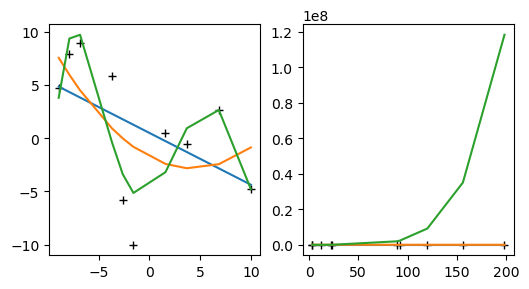

In [139]:
# visualising what went wrong.
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=False)
labels = ["line", "parabola", "five"]
models = [model_oneD, model_twoD, model_fiveD]
train = (train_ftrs, train_trgt)
test = (test_ftrs, test_trgt)
for ax, (ftrs, trgt) in zip(axes, [train, test]):
    ax.plot(ftrs, trgt, "k+")
    for model, label in zip(models, labels):
        ftrs = sorted(ftrs)
        ax.plot(ftrs, model(ftrs), "-")

<Axes: xlabel='Complexity'>

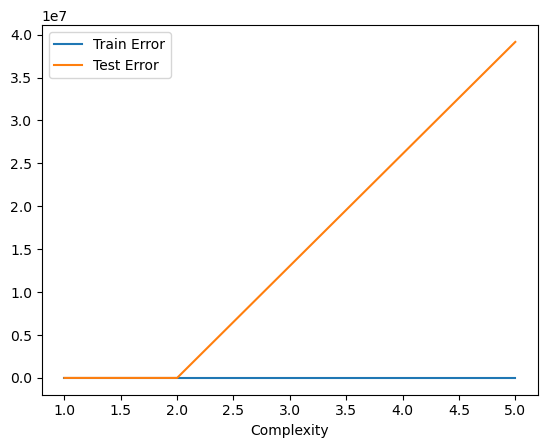

In [151]:
results = []
for complexity in [1, 2, 5]:
    model = np.poly1d(np.polyfit(train_ftrs, train_trgt, complexity))
    train_error = np.sqrt(metrics.mean_squared_error(train_trgt, model(train_ftrs)))
    test_error = np.sqrt(metrics.mean_squared_error(test_trgt, model(test_ftrs)))
    results.append((complexity, train_error, test_error))
columns = ["Complexity", "Train Error", "Test Error"]
results_dataframe = (pd.DataFrame.from_records(results, columns=columns, index="Complexity"))
results_dataframe.plot()